# Strategic Financial Planning & Growth Analytics #

Company Name: Nova Essentials

Business Model: An E-commerce retailer that sells a variety of high-quality goods directly to consumers. 
The company's main revenue streams come from a diverse product catalog, including electronics, home goods and a monthly subscription box service

## 1.0) Project Rationale ##

Financial Planning & Analysis (FP&A) is a vital function responsible for strategic decision support, budgeting, and forecasting. While traditional FP&A relies on historical data, modern businesses are moving to a data-driven approach that integrates customer analytics to optimize resource allocation and drive long-term growth. This project simulates the role of a data-driven FP&A analyst to address this need, leveraging a unique blend of financial acumen and data science skills to connect operational drivers to strategic financial outcomes.

## 1.1) Problem Statement ##
Traditional FP&A functions often struggle to directly link operational drivers to long-term financial outcomes. This project aims to solve this by creating a model that connects customer-centric metrics to profitability, providing a clear view of how business decisions impact the bottom line.

## 1.2) Objectives ##
The primary objective is to build a predictive and analytical model that empowers strategic financial decision-making.

The specific objectives are:

a) To perform end-to-end data engineering on a simulated dataset to prepare it for analysis and modeling.

b) To segment customers using an unsupervised machine learning model to identify distinct groups with varying profitability.

c) To estimate Customer Lifetime Value (CLV) against Customer Acquisition Cost (CAC) for each segment to pinpoint the most profitable customer profiles.

d) To develop an advanced time-series model to forecast monthly revenue, providing an accurate 36-month outlook by customer segment.

e) To create a dynamic scenario modeling tool that analyzes the impact of changes in key drivers, such as churn rates or Customer acquisition cost, on     overall profitability.

## 1.3) Key Deliverables ##
The project will result in a comprehensive, full-stack solution including:

a) A Classification Model for Customer Churn: A robust, machine learning-based model to predict which customers are at high risk of churning, enabling     proactive retention strategies.

b) An Interactive Dashboard for Scenario Comparison: A dynamic web application that allows stakeholders to perform side-by-side scenario analysis on       key drivers and visualize the impact on profitability.

c) A Professional Business Report: A detailed written report documenting the end-to-end data engineering, modeling methodology, key findings and           actionable recommendations with a clear financial rationale.

## 1.4) Success Metrics ##
The project's success will be measured by its ability to generate clear, data-driven insights that can be used to optimize resource allocation and drive long-term growth. The model’s effectiveness will be validated through:

Model Performance: Achieving a high level of accuracy in predicting churn and a low error rate in revenue forecasting.

Actionable Insights: The model's ability to provide clear, data-backed answers to critical business questions like, "What happens to profitability if churn rises or CAC increases?"

Quantifiable Impact: Providing a demonstrable Return on Investment (ROI) analysis for a simulated customer retention campaign, proving the project's financial value

Datasets generation

In [ ]:
# import required libraries

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import timedelta

In [10]:
# --- Customer Info Data ---
num_customers = 1000  # Increased to provide more data for segmentation
customer_data = {
    'customer_id': range(1, num_customers + 1),
    'age': np.random.randint(18, 70, num_customers),
    'city': np.random.choice(['Nairobi', 'Mombasa', 'Kisumu', 'Nakuru', np.nan], num_customers),
    'signup_date': pd.to_datetime('2022-01-01') + pd.to_timedelta(np.random.randint(0, 1095, num_customers), unit='D')
}
customer_df = pd.DataFrame(customer_data)
# Introduce missing values and outliers
customer_df.loc[customer_df.sample(frac=0.05).index, 'age'] = np.nan
customer_df.loc[customer_df.sample(frac=0.03).index, 'city'] = np.nan
customer_df.loc[np.random.randint(0, num_customers, 5), 'age'] = np.random.randint(100, 120, 5)
customer_df.to_csv('customer_info.csv', index=False)
print(customer_df.head())

   customer_id   age     city signup_date
0            1  55.0   Nakuru  2024-09-16
1            2  48.0   Kisumu  2022-03-02
2            3  19.0   Nakuru  2022-02-20
3            4  32.0   Nakuru  2024-04-16
4            5  69.0  Nairobi  2023-12-16


In [11]:
# --- Transactions Data ---
num_transactions = 25000  # Increased to provide more granularity
products = {
    'Electronics': 200, 
    'Apparel': 50, 
    'Home Goods': 80, 
    'Subscription Box': 30, 
    'Accessories': 25, 
    np.nan: np.nan
}
transaction_data = {
    'transaction_id': range(1, num_transactions + 1),
    'customer_id': np.random.randint(1, num_customers + 1, num_transactions),
    'transaction_date': pd.to_datetime('2022-01-01') + pd.to_timedelta(np.random.randint(0, 1095, num_transactions), unit='D'),
    'product_category': np.random.choice(list(products.keys()), num_transactions, p=[0.2, 0.3, 0.15, 0.1, 0.2, 0.05]),
    'product_cost': np.random.choice(list(products.values()), num_transactions, p=[0.2, 0.3, 0.15, 0.1, 0.2, 0.05]),
    'discount_amount': np.random.uniform(0, 10, num_transactions)
}
transactions_df = pd.DataFrame(transaction_data)
# Introduce messy data: negative values, inconsistent capitalization
transactions_df.loc[transactions_df.sample(frac=0.01).index, 'product_cost'] = -transactions_df['product_cost']
transactions_df.loc[transactions_df.sample(frac=0.02).index, 'product_category'] = 'electronics'
transactions_df.loc[transactions_df.sample(frac=0.01).index, 'product_category'] = 'home goods'
transactions_df.loc[transactions_df.sample(frac=0.01).index, 'product_category'] = np.nan
transactions_df.to_csv('transactions.csv', index=False)
print(transactions_df.head())

   transaction_id  customer_id transaction_date product_category  \
0               1          774       2022-01-18      Accessories   
1               2          268       2024-10-12       Home Goods   
2               3          939       2022-07-23          Apparel   
3               4          852       2024-04-19      Accessories   
4               5          922       2022-06-24       Home Goods   

   product_cost  discount_amount  
0          50.0         4.991285  
1          25.0         7.894578  
2          50.0         7.823831  
3          50.0         2.949069  
4          25.0         0.524234  


In [17]:
# --- Marketing Spend Data ---
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2024-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
marketing_data = {
    'month': date_range,
    'social_media_spend': np.random.uniform(5000, 15000, len(date_range)),
    'search_engine_spend': np.random.uniform(10000, 30000, len(date_range)),
    'affiliate_spend': np.random.uniform(2000, 8000, len(date_range))
}
marketing_df = pd.DataFrame(marketing_data)
# Simulate a campaign spike
marketing_df.loc[marketing_df['month'] == '2023-11-01', 'social_media_spend'] = 30000
marketing_df.loc[marketing_df['month'] == '2023-12-01', 'search_engine_spend'] = 50000
marketing_df.to_csv('marketing_spend.csv', index=False)
print(marketing_df.head(10))

       month  social_media_spend  search_engine_spend  affiliate_spend
0 2022-01-01        13502.209586         25294.179563      5335.303229
1 2022-02-01         9204.828446         15371.756782      3076.885780
2 2022-03-01        11040.400893         24621.806044      4527.841769
3 2022-04-01         5773.261839         16602.109039      2648.676083
4 2022-05-01        14388.887863         17293.984410      5843.349297
5 2022-06-01         9373.418558         13911.557485      7545.838825
6 2022-07-01         8261.561977         10271.829706      6545.801351
7 2022-08-01        13103.429280         29008.054213      5999.406905
8 2022-09-01        13277.650489         15517.114904      7399.055777
9 2022-10-01        10325.707703         17835.473436      4107.498887


In [18]:
# --- Operating Expenses Data ---
operating_expenses_data = {
    'month': date_range,
    'salary_costs': np.random.uniform(20000, 40000, len(date_range)),
    'rent_costs': np.random.uniform(10000, 15000, len(date_range)),
    'software_costs': np.random.uniform(5000, 10000, len(date_range)),
    'utilities_costs': np.random.uniform(1500, 3000, len(date_range)),
    'shipping_costs': np.random.uniform(8000, 15000, len(date_range)),
    'other_expenses': np.random.uniform(1000, 2500, len(date_range))
}
operating_expenses_df = pd.DataFrame(operating_expenses_data)
# Introduce some missing values
operating_expenses_df.loc[operating_expenses_df.sample(frac=0.03).index, 'salary_costs'] = np.nan
operating_expenses_df.to_csv('operating_expenses.csv', index=False)
print(marketing_df.head(10))

       month  social_media_spend  search_engine_spend  affiliate_spend
0 2022-01-01        13502.209586         25294.179563      5335.303229
1 2022-02-01         9204.828446         15371.756782      3076.885780
2 2022-03-01        11040.400893         24621.806044      4527.841769
3 2022-04-01         5773.261839         16602.109039      2648.676083
4 2022-05-01        14388.887863         17293.984410      5843.349297
5 2022-06-01         9373.418558         13911.557485      7545.838825
6 2022-07-01         8261.561977         10271.829706      6545.801351
7 2022-08-01        13103.429280         29008.054213      5999.406905
8 2022-09-01        13277.650489         15517.114904      7399.055777
9 2022-10-01        10325.707703         17835.473436      4107.498887


In [ ]:
ETL

In [20]:
import pandas as pd
import numpy as np

# ==============================================================================
# 2. ETL (EXTRACT, TRANSFORM, LOAD) PROCESS
#    This section cleans, processes, and merges the raw data.
# ==============================================================================

print("Starting ETL process...")

# --- 2.1: Extract ---
# Load the generated CSV files
try:
    customer_df = pd.read_csv('customer_info.csv')
    transactions_df = pd.read_csv('transactions.csv')
    marketing_df = pd.read_csv('marketing_spend.csv')
    operating_expenses_df = pd.read_csv('operating_expenses.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure all four CSV files are in the same directory as this notebook.")
    # You would stop execution here in a real notebook
    # raise e

# --- 2.2: Transform ---
# Data Cleaning: Customer Data
customer_df['age'] = customer_df['age'].fillna(customer_df['age'].mean())
customer_df['city'] = customer_df['city'].fillna(customer_df['city'].mode()[0])
customer_df = customer_df[customer_df['age'] < 100]

# Data Cleaning: Transaction Data
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['product_category'] = transactions_df['product_category'].str.capitalize().fillna('Uncategorized')
transactions_df['product_cost'] = transactions_df['product_cost'].abs()
transactions_df['transaction_value'] = transactions_df['product_cost'] - transactions_df['discount_amount']
transactions_df['customer_id'] = transactions_df['customer_id'].astype(int)

# --- 2.3: Feature Engineering & Aggregation (Monthly) ---
# Aggregate transactions data by month to get Monthly_Revenue, COGS, etc.
monthly_transactions_df = transactions_df.set_index('transaction_date').resample('MS').agg(
    monthly_revenue=('transaction_value', 'sum'),
    monthly_cogs=('product_cost', 'sum'),
    monthly_discounts=('discount_amount', 'sum'),
    new_customers_acquired=('customer_id', 'nunique')
).reset_index().rename(columns={'transaction_date': 'month'})

# Correct data types for 'month' columns before merging
marketing_df['month'] = pd.to_datetime(marketing_df['month'])
operating_expenses_df['month'] = pd.to_datetime(operating_expenses_df['month'])

# --- 2.4: Merging all Time-Series Data ---
master_df = pd.merge(monthly_transactions_df, marketing_df, on='month', how='left')
master_df = pd.merge(master_df, operating_expenses_df, on='month', how='left')

# ==============================================================================
# 3. FEATURE ENGINEERING (ON THE MASTER DATAFRAME)
#    This section calculates key FP&A metrics.
# ==============================================================================

# Profitability Metrics
master_df['gross_profit'] = master_df['monthly_revenue'] - master_df['monthly_cogs']
master_df['gross_profit_margin'] = (master_df['gross_profit'] / master_df['monthly_revenue']) * 100
master_df['total_operating_expenses'] = master_df['salary_costs'] + master_df['rent_costs'] + master_df['software_costs'] + master_df['utilities_costs'] + master_df['shipping_costs'] + master_df['other_expenses']
master_df['net_income'] = (master_df['gross_profit'] - master_df['total_operating_expenses'])
master_df['net_profit_margin'] = (master_df['net_income'] / master_df['monthly_revenue']) * 100

# Time-Series Features for forecasting
master_df['monthly_revenue_lag_1'] = master_df['monthly_revenue'].shift(1)
master_df['rolling_revenue_3m'] = master_df['monthly_revenue'].rolling(window=3).mean()

# Drop rows with NaN values created by lag and rolling features
master_df = master_df.dropna().reset_index(drop=True)

# ==============================================================================
# 4. FINAL OUTPUT
# ==============================================================================

# Save the final clean and feature-rich dataset
master_df.to_csv('ecomm_fpna_master_data.csv', index=False)
print("\nETL and Feature Engineering complete. The 'ecomm_fpna_master_data.csv' is ready for analysis.")
print(master_df.head())

Starting ETL process...

ETL and Feature Engineering complete. The 'ecomm_fpna_master_data.csv' is ready for analysis.
       month  monthly_revenue  monthly_cogs  monthly_discounts  \
0 2022-03-01     54206.238651       57735.0        3748.887577   
1 2022-04-01     46304.510924       49435.0        3284.022627   
2 2022-05-01     45522.849934       48465.0        3097.403310   
3 2022-07-01     49333.379807       52850.0        3676.448588   
4 2022-08-01     50004.114584       53190.0        3364.036103   

   new_customers_acquired  social_media_spend  search_engine_spend  \
0                     521        11040.400893         24621.806044   
1                     491         5773.261839         16602.109039   
2                     462        14388.887863         17293.984410   
3                     510         8261.561977         10271.829706   
4                     495        13103.429280         29008.054213   

   affiliate_spend  salary_costs    rent_costs  ...  utilities_

2.EDA
Before you build any models, you must understand your data. This is where you'll visualize and summarize your metrics to identify trends, patterns, and relationships.

In [23]:
#2.1 Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the feature-rich master data
df = pd.read_csv('ecomm_fpna_master_data.csv')
df['month'] = pd.to_datetime(df['month'])

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

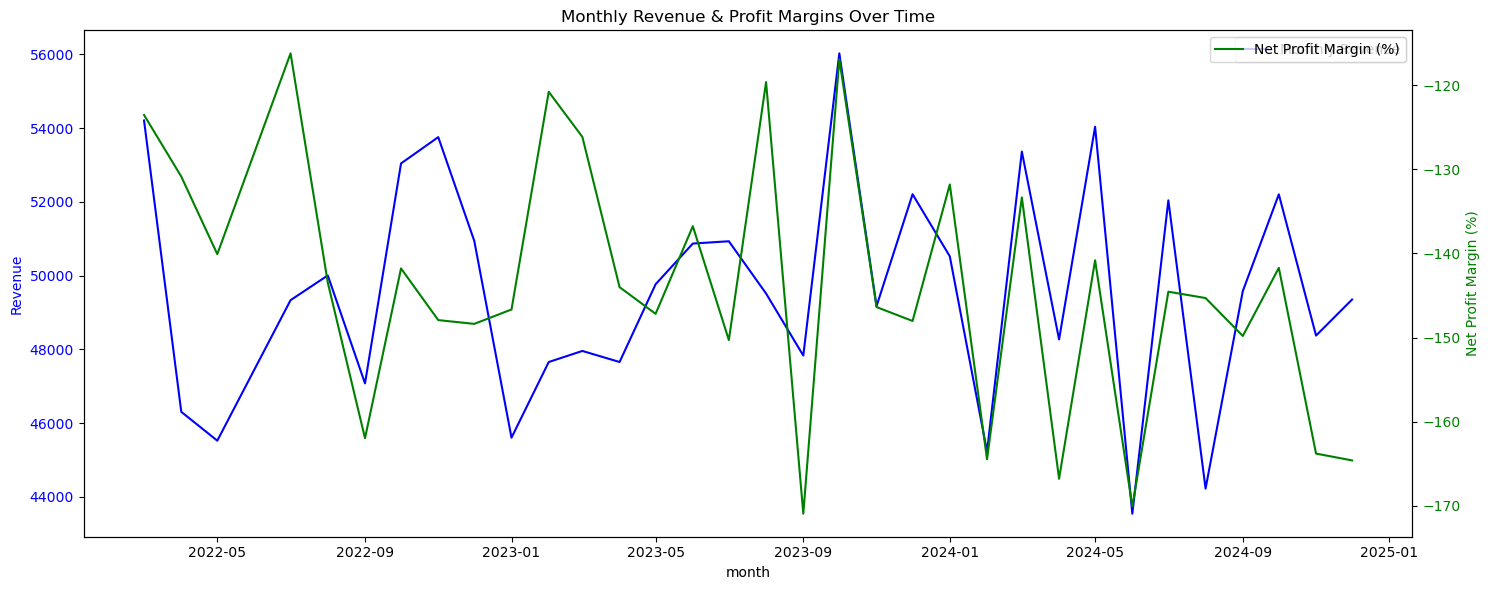

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

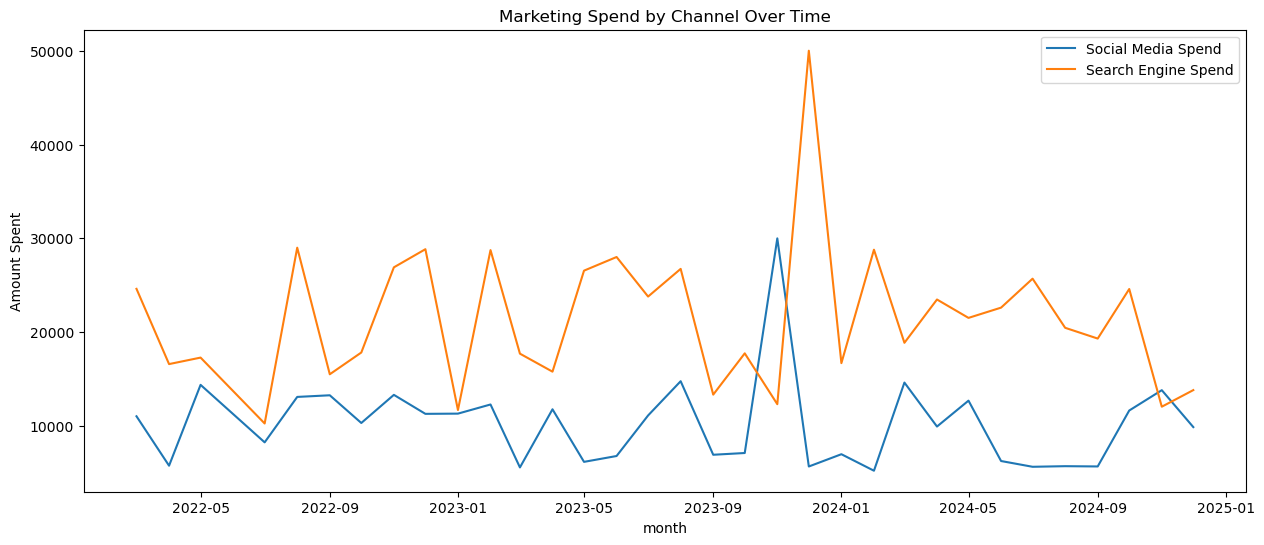

In [25]:
#1.2 Analyze Key Trends Over Time
#Create visualizations to show the trends of your core financial metrics and operational drivers.
#This helps you identify seasonality and understand the business's performance

# Plotting Revenue and Profit Margins over time
fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(data=df, x='month', y='monthly_revenue', ax=ax1, label='Monthly Revenue', color='blue')
ax1.set_title('Monthly Revenue & Profit Margins Over Time')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
sns.lineplot(data=df, x='month', y='net_profit_margin', ax=ax2, label='Net Profit Margin (%)', color='green')
ax2.set_ylabel('Net Profit Margin (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
fig.tight_layout()
plt.show()

# Plotting Marketing Spend
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='month', y='social_media_spend', label='Social Media Spend')
sns.lineplot(data=df, x='month', y='search_engine_spend', label='Search Engine Spend')
plt.title('Marketing Spend by Channel Over Time')
plt.ylabel('Amount Spent')
plt.show()    

Step 2: Customer Segmentation
This is where you use an unsupervised machine learning model to segment your customers. We'll use the K-Means clustering algorithm to group them based on their purchasing behavior.

2.1 Prepare Data for Segmentation
You need to load the raw transactions.csv and customer_info.csv to calculate RFM and CLV scores. This is a separate analysis from the time-series forecasting.

In [28]:
# --- Step 2: Customer Segmentation ---

# 2.1 Prepare Data for Segmentation
# Load raw data to calculate CLV and RFM
customer_df = pd.read_csv('customer_info.csv')
transactions_df = pd.read_csv('transactions.csv')

# Data Cleaning: Transaction Data (this is the crucial part that was missing)
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['product_category'] = transactions_df['product_category'].str.capitalize().fillna('Uncategorized')
transactions_df['product_cost'] = transactions_df['product_cost'].abs()
transactions_df['transaction_value'] = transactions_df['product_cost'] - transactions_df['discount_amount']

# Calculate RFM scores
latest_date = transactions_df['transaction_date'].max()
rfm_df = transactions_df.groupby('customer_id').agg(
    recency=('transaction_date', lambda date: (latest_date - date.max()).days),
    frequency=('transaction_id', 'count'),
    monetary=('transaction_value', 'sum')
).reset_index()

# Scale RFM values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['recency', 'frequency', 'monetary']])

# 2.2 K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)

print("K-Means clustering complete. The RFM DataFrame with customer clusters is ready.")
print(rfm_df.head())

C:\Users\ALLAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K-Means clustering complete. The RFM DataFrame with customer clusters is ready.
   customer_id  recency  frequency     monetary  cluster
0            1       63         17   873.670326        2
1            2        1         41  2367.586781        1
2            3       22         27  1963.034341        3
3            4       66         31  2098.747882        1
4            5       34         24  2039.930471        3


Step 3: Advanced Revenue Forecasting (using Facebook Prophet)
This is the core FP&A deliverable. You'll use Prophet to forecast monthly revenue, which is a key demonstration of your advanced time-series skills.

3.1 Prepare Data for Prophet
Prophet requires a specific DataFrame format with two columns: ds (for dates) and y (for the metric you're forecasting, in this case, revenue).

23:52:35 - cmdstanpy - INFO - Chain [1] start processing
23:52:35 - cmdstanpy - INFO - Chain [1] done processing


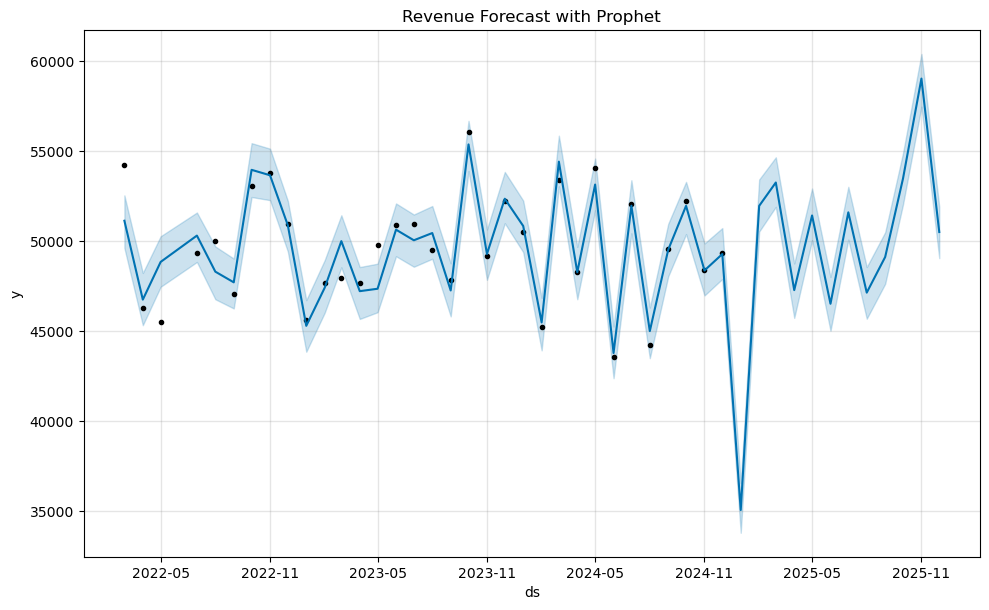

In [31]:
# Prepare the master_df for Prophet
prophet_df = df[['month', 'monthly_revenue']].rename(columns={'month': 'ds', 'monthly_revenue': 'y'})

# 3.2 Build and Fit the Prophet Model
from prophet import Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='KE') # Assuming Kenya as the location
model.fit(prophet_df)

# 3.3 Forecast Future Revenue
future_dates = model.make_future_dataframe(periods=12, freq='MS') # Forecast for the next 12 months
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Revenue Forecast with Prophet")
plt.show()

4.Advanced analysis and modelling

4.1
This first block loads your main data and performs an initial analysis of profitability by product category

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the feature-rich master data
master_df = pd.read_csv('ecomm_fpna_master_data.csv')
master_df['month'] = pd.to_datetime(master_df['month'])

# Load raw transaction data for profitability analysis
transactions_df = pd.read_csv('transactions.csv')
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['product_category'] = transactions_df['product_category'].str.capitalize().fillna('Uncategorized')
transactions_df['product_cost'] = transactions_df['product_cost'].abs()
transactions_df['revenue'] = transactions_df['product_cost'] - transactions_df['discount_amount']

# Analyze profitability by product category
category_profit_df = transactions_df.groupby('product_category').agg(
    total_revenue=('revenue', 'sum'),
    total_cost=('product_cost', 'sum'),
    total_transactions=('transaction_id', 'count')
).reset_index()

category_profit_df['gross_profit'] = category_profit_df['total_revenue'] - category_profit_df['total_cost']
category_profit_df['gross_profit_margin'] = (category_profit_df['gross_profit'] / category_profit_df['total_revenue']) * 100

print("Product Category Profitability:")
print(category_profit_df.sort_values('gross_profit_margin', ascending=False))

Product Category Profitability:
   product_category  total_revenue  total_cost  total_transactions  \
1           Apparel  526844.132615    561275.0                7300   
0       Accessories  338972.824412    361350.0                4739   
4  Subscription box  170047.071665    181280.0                2427   
5     Uncategorized  101032.982895    107775.0                1411   
2       Electronics  373696.094453    398840.0                5320   
3        Home goods  271928.747404    290345.0                3803   

   gross_profit  gross_profit_margin  
1 -34430.867385            -6.535304  
0 -22377.175588            -6.601466  
4 -11232.928335            -6.605776  
5  -6742.017105            -6.673085  
2 -25143.905547            -6.728437  
3 -18416.252596            -6.772455  


4.2 Customer Segmentation & CLV Analysis 🧑‍🤝‍🧑
This block loads the raw data, calculates RFM and CLV, and then uses K-Means to segment your customers. The result (rfm_df) is crucial for the next step

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load raw data for customer-level analysis
customer_df = pd.read_csv('customer_info.csv')
transactions_df = pd.read_csv('transactions.csv')
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['revenue'] = transactions_df['product_cost'].abs() - transactions_df['discount_amount']

# Calculate RFM scores
latest_date = transactions_df['transaction_date'].max()
rfm_df = transactions_df.groupby('customer_id').agg(
    recency=('transaction_date', lambda date: (latest_date - date.max()).days),
    frequency=('transaction_id', 'count'),
    monetary=('revenue', 'sum')
).reset_index()

# Calculate Customer Lifetime Value (CLV)
avg_atv = rfm_df['monetary'].mean() / rfm_df['frequency'].mean()
avg_freq = rfm_df['frequency'].mean()
avg_lifespan = 3  # Assumption: years
rfm_df['clv'] = avg_atv * avg_freq * avg_lifespan

# Scale RFM and CLV values for clustering
features = ['recency', 'frequency', 'monetary', 'clv']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm_df[features])

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_df['cluster'] = kmeans.fit_predict(scaled_features)

print("\nCustomer Segmentation complete. RFM DataFrame with clusters created.")
rfm_df.to_csv('customer_segments.csv', index=False)
print("  - customer_segments.csv saved for the dashboard.")

C:\Users\ALLAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(



Customer Segmentation complete. RFM DataFrame with clusters created.
  - customer_segments.csv saved for the dashboard.


4.3
Churn Prediction & ROI Analysis 💰
This is where you build the churn model and perform the ROI analysis. It relies on the rfm_df you created in the previous step.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pickle

# Load the RFM DataFrame from the previous step
rfm_df = pd.read_csv('customer_segments.csv')

# Create a churn flag
churn_threshold_days = 60
rfm_df['is_churned'] = (rfm_df['recency'] > churn_threshold_days).astype(int)

# Build Churn Prediction Model
X = rfm_df[['recency', 'frequency', 'monetary', 'clv']]
y = rfm_df['is_churned']

# Handle data imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model_churn = RandomForestClassifier(random_state=42)
model_churn.fit(X_train, y_train)

# Save the trained churn model for the Streamlit app
with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model_churn, f)
print("\nChurn prediction model trained and saved as 'churn_model.pkl'.")


Churn prediction model trained and saved as 'churn_model.pkl'.


4.4
Advanced Revenue Forecasting (Prophet) 🔮
This block uses the master_df to build and forecast revenue with Facebook Prophet.

In [38]:
from prophet import Prophet

# Load the master_df from Step 1
master_df = pd.read_csv('ecomm_fpna_master_data.csv')
master_df['month'] = pd.to_datetime(master_df['month'])

# Prepare data for Prophet
prophet_df = master_df[['month', 'monthly_revenue']].rename(columns={'month': 'ds', 'monthly_revenue': 'y'})

# Build and Fit the Prophet Model
model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=False)
model_prophet.add_country_holidays(country_name='KE')
model_prophet.fit(prophet_df)

# Forecast future revenue
future_dates = model_prophet.make_future_dataframe(periods=12, freq='MS')
forecast = model_prophet.predict(future_dates)

# Save the Prophet model and forecast for the Streamlit app
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model_prophet, f)
forecast.to_csv('prophet_forecast.csv', index=False)
print("\nProphet model and forecast saved.")

00:14:37 - cmdstanpy - INFO - Chain [1] start processing
00:14:38 - cmdstanpy - INFO - Chain [1] done processing



Prophet model and forecast saved.


In [40]:
# app.py
import streamlit as st
import pandas as pd
import pickle
from prophet.plot import plot_plotly
import plotly.graph_objects as go
import numpy as np

# ==============================================================================
# 1. STREAMLIT CONFIGURATION
#    This must be the first Streamlit command in the script.
# ==============================================================================
st.set_page_config(layout="wide")

# ==============================================================================
# 2. DATA AND MODEL LOADING
#    This section loads all the files you created in the previous phase.
# ==============================================================================

try:
    @st.cache_data
    def load_data():
        master_df = pd.read_csv('ecomm_fpna_master_data.csv')
        master_df['month'] = pd.to_datetime(master_df['month'])
        
        customer_segments_df = pd.read_csv('customer_segments.csv')
        
        # Load Prophet forecast data
        prophet_forecast_df = pd.read_csv('prophet_forecast.csv')
        prophet_forecast_df['ds'] = pd.to_datetime(prophet_forecast_df['ds'])
        
        return master_df, customer_segments_df, prophet_forecast_df

    master_df, customer_segments_df, prophet_forecast_df = load_data()
    
    # Load the churn model
    with open('churn_model.pkl', 'rb') as f:
        churn_model = pickle.load(f)
        
    # Load the Prophet model for scenario analysis
    with open('prophet_model.pkl', 'rb') as f:
        prophet_model = pickle.load(f)

except FileNotFoundError as e:
    st.error(f"Error: {e}. Please ensure all necessary CSV and model files are in the same directory as this app.py file.")
    st.stop()


# ==============================================================================
# 3. HELPER FUNCTIONS FOR SCENARIO MODELING
# ==============================================================================

def run_scenario(df, marketing_spend_change, churn_rate_change):
    scenario_df = df.copy()

    # Calculate the total marketing spend from individual channels
    scenario_df['total_marketing_spend'] = scenario_df['social_media_spend'] + scenario_df['search_engine_spend'] + scenario_df['affiliate_spend']
    
    # Apply changes to key drivers
    scenario_df['total_marketing_spend'] = scenario_df['total_marketing_spend'] * (1 + marketing_spend_change / 100)
    
    # A simplified way to model churn's impact on revenue.
    # We assume revenue is impacted by churn.
    scenario_df['monthly_revenue'] = scenario_df['monthly_revenue'] * (1 - churn_rate_change / 100)

    # Re-calculate profitability metrics based on new revenue and spend
    scenario_df['monthly_cogs'] = scenario_df['monthly_revenue'] * (scenario_df['monthly_cogs'] / scenario_df['monthly_revenue'].shift(1)).fillna(0.3)
    scenario_df['gross_profit'] = scenario_df['monthly_revenue'] - scenario_df['monthly_cogs']
    scenario_df['total_operating_expenses'] = scenario_df['total_operating_expenses'].replace(np.nan, 0)
    scenario_df['net_income'] = (scenario_df['gross_profit'] - scenario_df['total_operating_expenses']) * 0.75

    return scenario_df

# ==============================================================================
# 4. STREAMLIT APP LAYOUT AND CONTENT
# ==============================================================================

st.title("📊 Nova Essentials: Strategic FP&A Dashboard")

# Sidebar for Scenario Comparison Tool
st.sidebar.header("Scenario Comparison Tool")
st.sidebar.write("Adjust the sliders to model different business strategies.")
marketing_spend_change = st.sidebar.slider("Change in Marketing Spend (%)", -20, 20, 0, 5)
churn_rate_change = st.sidebar.slider("Change in Churn Rate (%)", -5, 5, 0, 1)

# --- Main Dashboard ---
st.header("1. Core Financial Performance")
col1, col2, col3 = st.columns(3)
with col1:
    st.metric("Total Revenue (3Y)", f"${master_df['monthly_revenue'].sum():,.0f}")
with col2:
    st.metric("Avg Net Profit Margin", f"{master_df['net_profit_margin'].mean():.2f}%")
with col3:
    st.metric("Avg Monthly New Customers", f"{master_df['new_customers_acquired'].mean():.0f}")

st.subheader("Historical Revenue & Profitability")
st.line_chart(master_df.set_index('month')[['monthly_revenue', 'net_income']])

# --- Customer Segmentation Analysis ---
st.header("2. Customer Segmentation Analysis")
st.write("Customers are segmented based on their purchasing behavior (Recency, Frequency, Monetary) and estimated Lifetime Value (CLV).")

segment_summary = customer_segments_df.groupby('cluster').agg(
    count=('customer_id', 'count'),
    avg_clv=('clv', 'mean'),
    avg_monetary=('monetary', 'mean'),
    avg_recency=('recency', 'mean')
).reset_index()

segment_summary['cluster'] = segment_summary['cluster'].map({
    0: 'Champions (High-Value)',
    1: 'Loyalists (Steady)',
    2: 'At-Risk (High Recency)',
    3: 'Newbies (Low Frequency)'
})

st.dataframe(segment_summary, use_container_width=True)

# --- Revenue Forecast & Scenario Modeling ---
st.header("3. Revenue Forecast & Scenario Modeling")
st.write("View the 12-month revenue forecast and compare a baseline to your customized scenario.")

col_forecast1, col_forecast2 = st.columns(2)

with col_forecast1:
    st.subheader("Baseline Forecast")
    fig1 = plot_plotly(prophet_model, prophet_forecast_df)
    st.plotly_chart(fig1)

with col_forecast2:
    st.subheader("Scenario Comparison")
    
    # Run scenarios
    baseline_scenario = run_scenario(master_df, 0, 0)
    new_scenario = run_scenario(master_df, marketing_spend_change, churn_rate_change)
    
    # Create comparison chart
    fig_comp = go.Figure()
    fig_comp.add_trace(go.Scatter(x=baseline_scenario['month'], y=baseline_scenario['monthly_revenue'], mode='lines', name='Baseline'))
    fig_comp.add_trace(go.Scatter(x=new_scenario['month'], y=new_scenario['monthly_revenue'], mode='lines', name='Scenario'))
    fig_comp.update_layout(title='Scenario Impact on Monthly Revenue', height=450, width=650)
    st.plotly_chart(fig_comp)


# --- Final Business Recommendations ---
st.header("4. Key Business Recommendations")
st.markdown("""
Based on the analysis, here are key recommendations to drive growth and profitability:

- **Focus on High-Value Segments**: Direct marketing spend towards the 'Champions' customer segment, as they have the highest CLV and monetary value.
- **Implement Retention Campaigns**: Use the churn model to target 'At-Risk' customers with personalized offers to improve retention and CLV.
- **Optimize Marketing Channels**: Analyze the ROI of different marketing channels to re-allocate budget for maximum efficiency.
- **Monitor Profit Margins**: Continuously track profit margins to ensure operational costs are not eroding the business's bottom line.
""")

2025-08-14 00:50:59.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 00:50:59.305 No runtime found, using MemoryCacheStorageManager
2025-08-14 00:50:59.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 00:50:59.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 00:50:59.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 00:50:59.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 00:50:59.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 00:50:59.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 00:50:59.325 Thread 'MainThread':

DeltaGenerator()